In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import resample


In [2]:
path="C://Users//david\Desktop//VU amsterdam//Data mining"
sb_samples = pd.read_csv(path+"/training_set_VU_DM.csv", nrows=1000000)
sb_samples.head()



,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [3]:
sb_samples.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [15]:
print(sb_samples['booking_bool'].value_counts())
#clicks 
print(sb_samples['click_bool'].value_counts())

0    4819957
1     138390
Name: booking_bool, dtype: int64
0    4736468
1     221879
Name: click_bool, dtype: int64


In [11]:
# Separate majority and minority classes
df_majority = sb_samples[sb_samples.booking_bool==0]
df_minority = sb_samples[sb_samples.booking_bool==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=138390,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.booking_bool.value_counts()

1    138390
0    138390
Name: booking_bool, dtype: int64

In [12]:
df_downsampled

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2098177,140839,2013-02-15 07:21:52,5,219,NaN,NaN,219,5885,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1112333,74279,2013-06-13 13:36:35,32,220,NaN,NaN,219,20587,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3563714,239331,2013-03-03 20:12:40,5,219,NaN,NaN,219,44963,2,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2505789,168274,2013-06-13 11:09:57,5,219,NaN,NaN,219,76814,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4855871,325846,2013-01-07 13:54:01,15,55,NaN,NaN,99,27499,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4940909,331626,2012-11-04 06:49:20,5,219,NaN,NaN,219,38260,3,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
811764,54280,2013-03-08 07:25:48,5,219,NaN,NaN,219,104261,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3109863,208814,2013-04-27 16:36:41,5,219,NaN,NaN,219,7673,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1532006,102791,2013-05-12 10:35:22,14,100,NaN,NaN,219,39263,2,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
934515,62371,2013-06-23 15:01:59,5,219,NaN,NaN,219,13659,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [9]:
#how many searches without a booking?
test = sb_samples.groupby("srch_id").booking_bool.sum()
print(test.shape)
print(test.value_counts())

(40173,)
1    27738
0    12435
Name: booking_bool, dtype: int64


In [8]:
#how many searches with how many a clicks?
test = sb_samples.groupby("srch_id").click_bool.sum()
print(test.shape)
print(test.value_counts())

(40173,)
1     37548
2      1774
3       437
4       189
5        87
6        60
7        32
8        10
10        7
9         6
11        6
12        3
13        2
14        2
15        2
16        2
17        2
24        1
19        1
20        1
25        1
Name: click_bool, dtype: int64


In [71]:
df_book = sb_samples.loc[sb_samples['booking_bool']==1]
df_click =sb_samples.loc[sb_samples["click_bool"]==1]

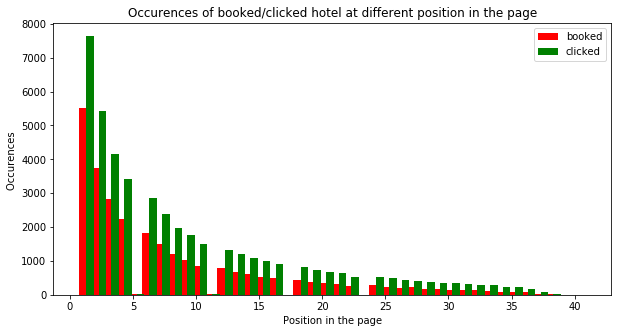

In [93]:
import matplotlib.pyplot as plt
#plot of positions in the page against count of booked hotels in that position
df_book=df_book[["srch_id", "position"]]
df_click=df_click[["srch_id", "position"]]
position_count= df_book.groupby("position").count()
position_count_c= df_click.groupby("position").count()
xaxes=[i for i in range(1,41)]
fig, ax = plt.subplots(figsize=(10,5))
width = 0.6
ax.bar(xaxes,position_count.iloc[:,0], width, color="r", label="booked")
xaxes=[i+width for i in xaxes]
ax.bar(xaxes,position_count_c.iloc[:,0], width, color="g",label="clicked")
plt.title("Occurences of booked/clicked hotel at different position in the page")
plt.xlabel("Position in the page")
plt.ylabel("Occurences ")
plt.legend()

In [73]:
position_count_c

,srch_id
position,
1,7643
2,5414
3,4169
4,3427
5,34
6,2847
7,2397
8,1981
9,1770
